In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pre_processing_functions import preprocess

def hierarchical_clustering(path, n_clusters=7, method='average'):
    data = preprocess(path)  # Load and preprocess data
    data= data.select_dtypes(include=[np.number])
    # Create linkage matrix for dendrogram
    linked = linkage(data, method=method)

    plt.figure(figsize=(12, 6))
    dendrogram(linked)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()

    # Fit Agglomerative Clustering model
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='cosine', linkage=method)
    cluster_labels = clusterer.fit_predict(data)

    return cluster_labels

Aqui está feito com average e cosine

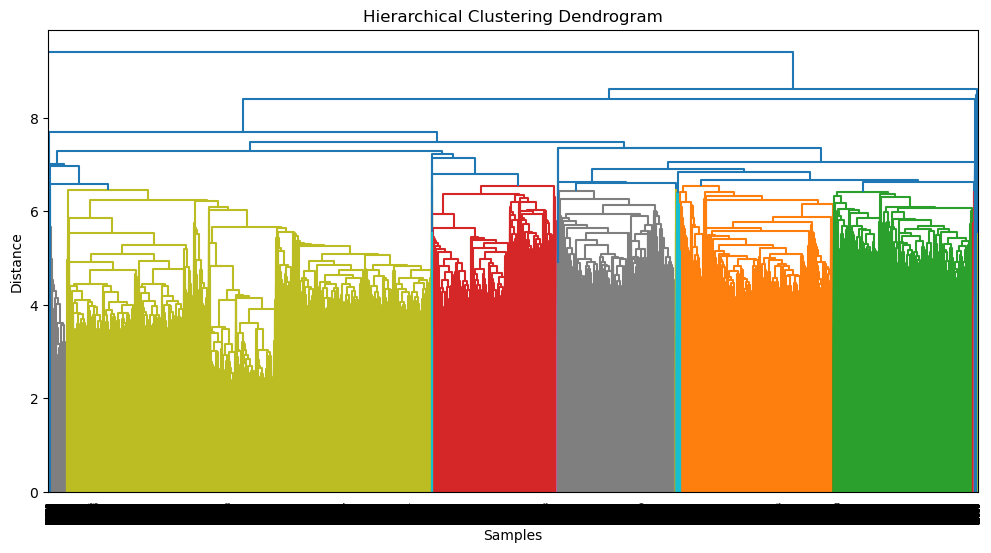

In [56]:

data_clustered_1 = hierarchical_clustering('customer_info.csv')

In [57]:

data_cosine = preprocess('customer_info.csv')  # Preprocess data
data_clustered_1= pd.DataFrame(data_clustered_1, columns=['Cluster'])
data_cosine['Cluster'] = data_clustered_1['Cluster']

In [58]:
!pip install umap-learn seaborn
import umap.umap_ as umap
import seaborn as sns
import matplotlib.pyplot as plt

def plot_umap_clusters(df, n_neighbors=8, min_dist=0.01):

    # Select only numeric columns (excluding 'Cluster')
    features = df.select_dtypes(include='number').drop(columns='Cluster', errors='ignore')
    features_scaled = features.values

    # Run UMAP
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
    embedding = reducer.fit_transform(features_scaled)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=df['Cluster'], palette='tab10', s=70)
    plt.title("UMAP clusters (hierarchical clustering)")
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()

/Users/constancasa/anaconda3/envs/MACHINE_LEARNING/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


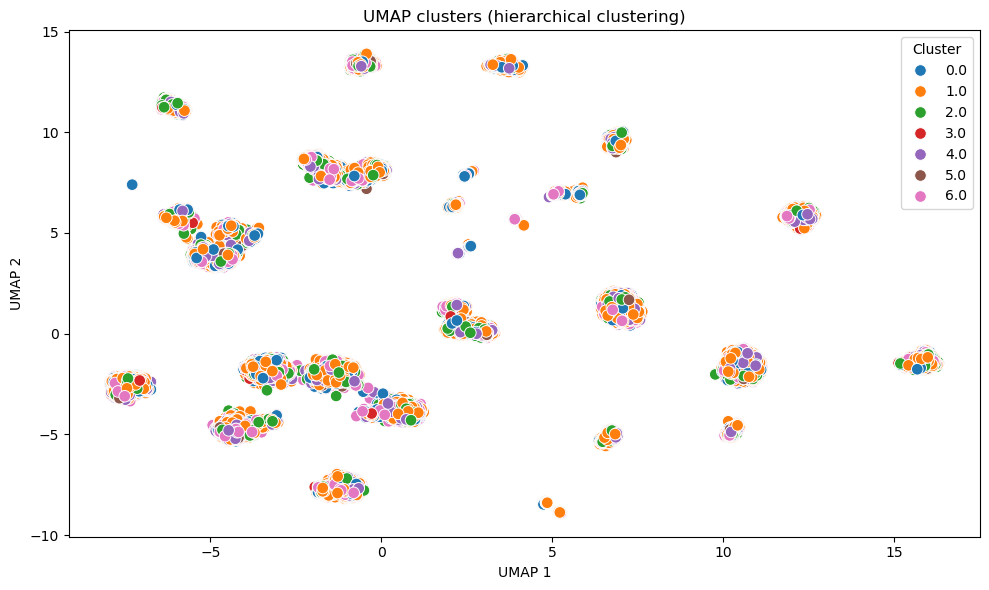

In [59]:
plot_umap_clusters(data_cosine)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pre_processing_functions import preprocess

def hierarchical_clustering(path, n_clusters=7, method='complete'):
    data = preprocess(path)  # Load and preprocess data
    data= data.select_dtypes(include=[np.number])
    # Create linkage matrix for dendrogram
    linked = linkage(data, method=method)

    plt.figure(figsize=(12, 6))
    dendrogram(linked)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()

    # Fit Agglomerative Clustering model
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage=method)
    cluster_labels = clusterer.fit_predict(data)

    return cluster_labels

Aqui está feito com complete e euclidean

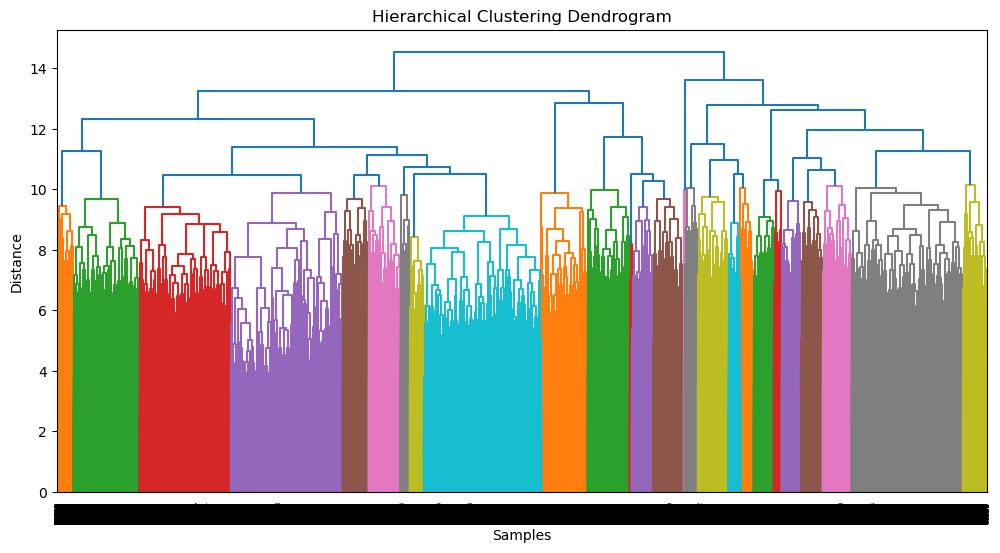

In [38]:
data_clustered = hierarchical_clustering('customer_info.csv')

In [39]:
data_euclidean = preprocess('customer_info.csv')  # Preprocess data
data_clustered= pd.DataFrame(data_clustered, columns=['Cluster'])
data_euclidean['Cluster'] = data_clustered['Cluster']

/Users/constancasa/anaconda3/envs/MACHINE_LEARNING/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


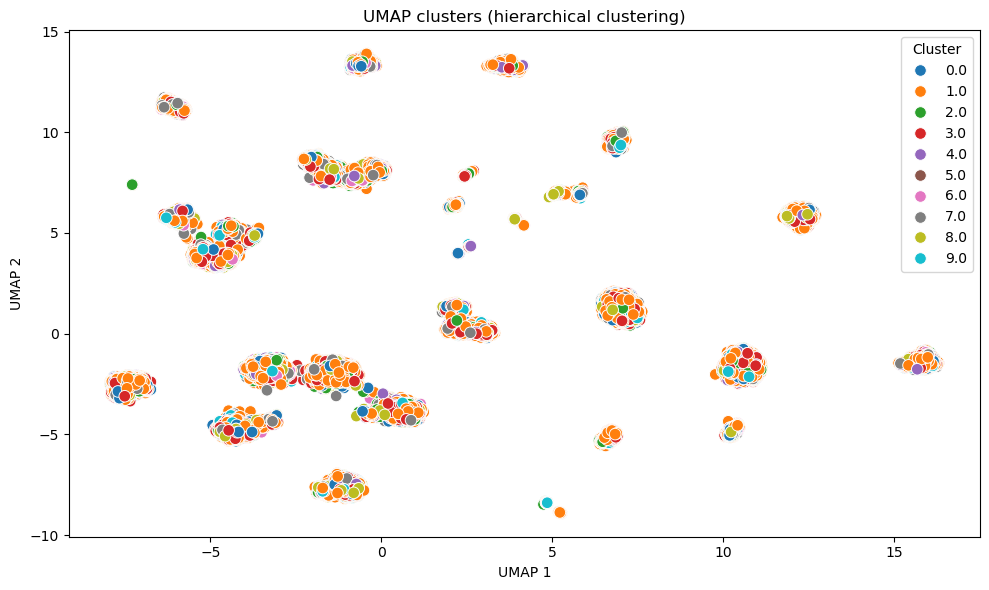

In [54]:
plot_umap_clusters(data_euclidean)